## **Linear vs. Nonlinear**

The "make_moons" data creation routine in sklearn produces non-linear data that is useful for understanding the difference between linear and non-linear classifiers.  he 

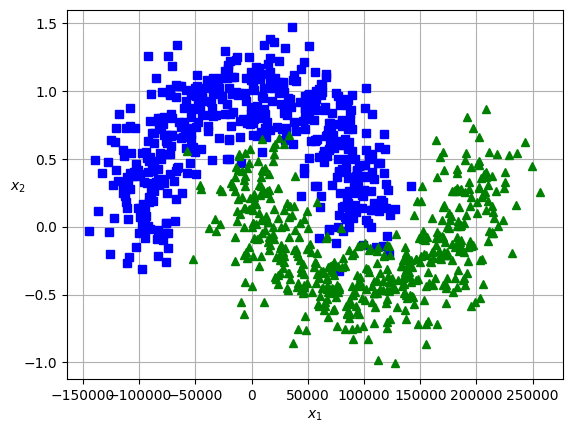

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X[:,0] = X[:,0]*100000


def plot_dataset(X, y, axes=None):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    if axes:
        plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plot_dataset(X, y)

**Exercise 1**

Using a simple train test split, run a simple LogisticRegression classifier on the above data. Try different solvers.  Which works the best?

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to try
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Train and evaluate Logistic Regression models with different solvers
for solver in solvers:
    print(f"Solver: {solver}")
    
    # Create and fit the Logistic Regression model
    model = LogisticRegression(solver=solver)
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

Solver: newton-cg
Accuracy: 0.8600

Solver: lbfgs
Accuracy: 0.6550

Solver: liblinear
Accuracy: 0.6550

Solver: sag
Accuracy: 0.6550

Solver: saga
Accuracy: 0.6550



/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/codespace/.local/li

**Exercise 2**

Note that the two dimensions have vastly different magnitudes. Modify the above, using a standard scaler and pipeline to transform the data.  Does it help?  Do the different solvers have the same relative performance?

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of solvers to try
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Train and evaluate Logistic Regression models with different solvers and StandardScaler
for solver in solvers:
    print(f"Solver: {solver}")
    
    # Create a pipeline with StandardScaler and Logistic Regression
    model = make_pipeline(StandardScaler(), LogisticRegression(solver=solver))
    
    # Fit the pipeline to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

Solver: newton-cg
Accuracy: 0.8550

Solver: lbfgs
Accuracy: 0.8550

Solver: liblinear
Accuracy: 0.8550

Solver: sag
Accuracy: 0.8550

Solver: saga
Accuracy: 0.8550



**Exercise 3**

Try the different following methods to classify your data:

1) GaussianNB
2) KNN (pick the best "nearest neighbors" parameter you can)
3) SVC, linear kernel
4) SVC, poly kernel
5) SVC, rbf kernel

Which performs the best?  Why do you think that is?

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Define classifiers
classifiers = {
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVC_linear": SVC(kernel='linear'),
    "SVC_poly": SVC(kernel='poly'),
    "SVC_rbf": SVC(kernel='rbf')
}

# Define parameters for KNN
knn_params = {'n_neighbors': range(1, 20)}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    print(f"Classifier: {name}")
    
    # Create pipeline with StandardScaler for classifiers that require it
    if name != "GaussianNB":
        pipeline = make_pipeline(StandardScaler(), clf)
    else:
        pipeline = clf
    
    # Special handling for KNN to find best n_neighbors
    if name == "KNN":
        grid_search = GridSearchCV(clf, knn_params, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        print("Best parameters:", best_params)
        clf = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
        pipeline = make_pipeline(StandardScaler(), clf)
    
    # Fit the classifier to the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")


Classifier: GaussianNB
Accuracy: 0.6600

Classifier: KNN
Best parameters: {'n_neighbors': 3}
Accuracy: 0.9850

Classifier: SVC_linear
Accuracy: 0.8550

Classifier: SVC_poly
Accuracy: 0.8500

Classifier: SVC_rbf
Accuracy: 0.9800



**Exercise 4**

In the following, I've set up some code to explore the impact of different parameters and data on an SVC.  As implemented, the current code illustrates how an 'rbf' kernel can overfit the data.  Vary the parameters to examine how different parameters influence performance and overfitting.

1) Try changing the amount of noise in the dataset.  What happens?
2) Try changing the parameter 'gamma.'  What setting seems to avoid overfitting while still performing well.  Have a look at the SVC [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) so you have an understanding of what's going on.
3) Try changing the kernel to a 'poly' kernel, and modify gamma as necessary.  How does this affect performance?

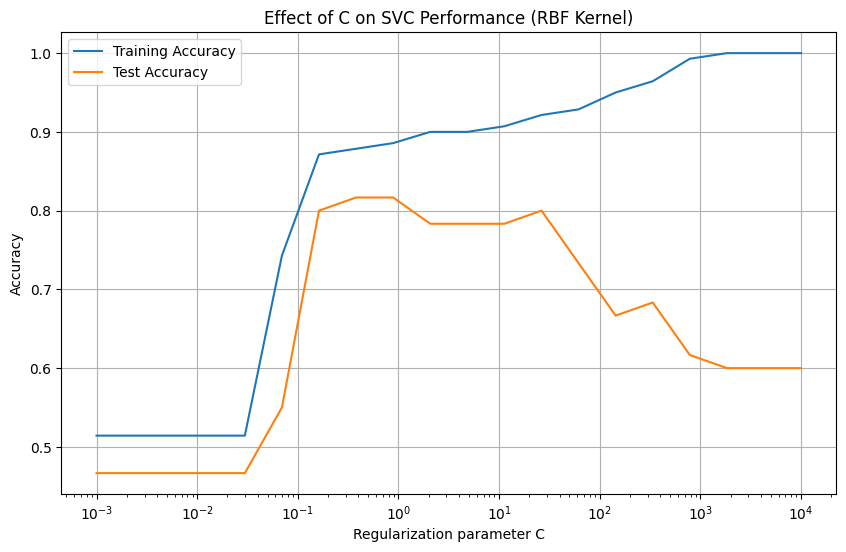

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate a noisy moons dataset
X, y = make_moons(n_samples=200, noise=0.4, random_state=42)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Range of C values to explore
C_values = np.logspace(-3, 4, 20)  # From very small to somewhat larger (10^4) C values
train_scores = []
test_scores = []

# Explore the effect of C
for C in C_values:
    clf = SVC(C=C, kernel='rbf', gamma=6)  # Using 'scale' for gamma as an example
    clf.fit(X_train, y_train)
    
    # Record training and test scores
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_scores, label='Training Accuracy')
plt.semilogx(C_values, test_scores, label='Test Accuracy')
plt.legend()
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of C on SVC Performance (RBF Kernel)')
plt.grid(True)
plt.show()

### Changing Noise results

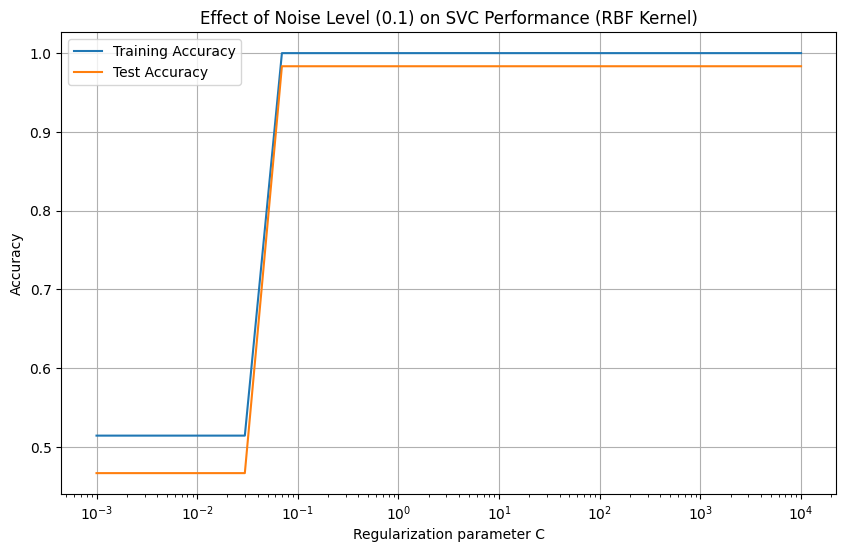

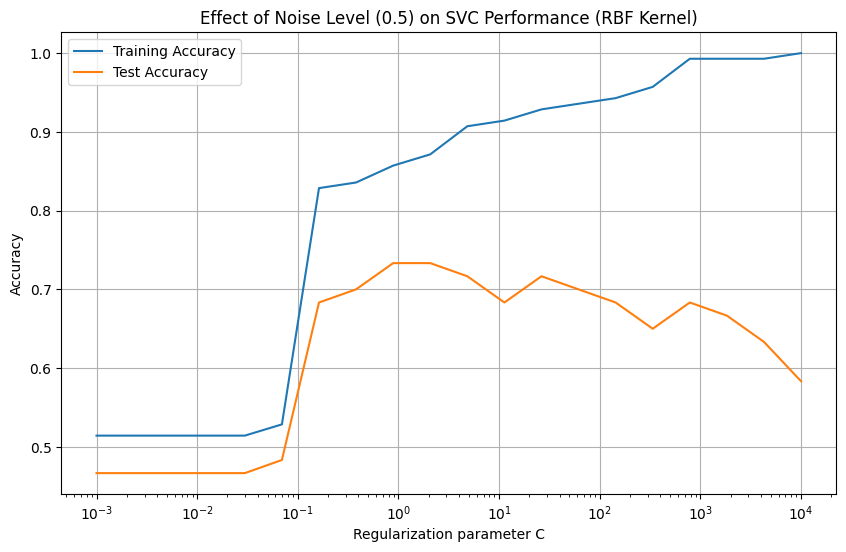

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Function to visualize the effect of noise on SVC performance
def plot_svc_performance(noise_level):
    # Generate a moons dataset with specified noise level
    X, y = make_moons(n_samples=200, noise=noise_level, random_state=42)

    # Splitting dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Range of C values to explore
    C_values = np.logspace(-3, 4, 20)  # From very small to somewhat larger (10^4) C values
    train_scores = []
    test_scores = []

    # Explore the effect of C
    for C in C_values:
        clf = SVC(C=C, kernel='rbf', gamma=6)  # Using 'scale' for gamma as an example
        clf.fit(X_train, y_train)

        # Record training and test scores
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.semilogx(C_values, train_scores, label='Training Accuracy')
    plt.semilogx(C_values, test_scores, label='Test Accuracy')
    plt.legend()
    plt.xlabel('Regularization parameter C')
    plt.ylabel('Accuracy')
    plt.title(f'Effect of Noise Level ({noise_level}) on SVC Performance (RBF Kernel)')
    plt.grid(True)
    plt.show()

# Call the function with different noise levels to visualize the effect
plot_svc_performance(noise_level=0.1)  # Example: low noise level
plot_svc_performance(noise_level=0.5)  # Example: high noise level


### Effect of change in gamma

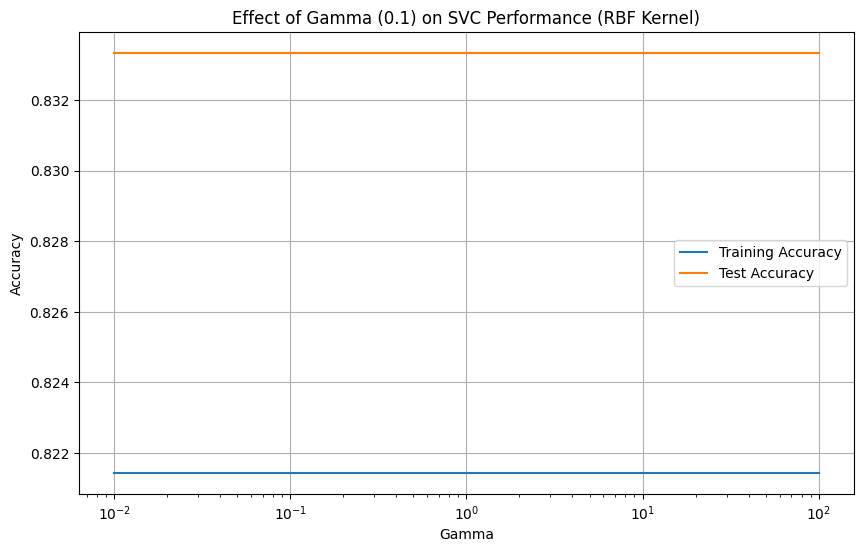

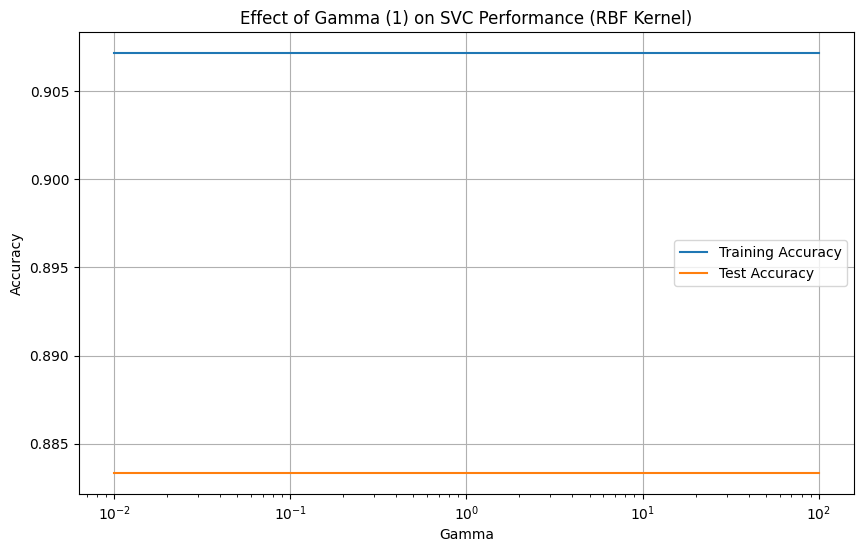

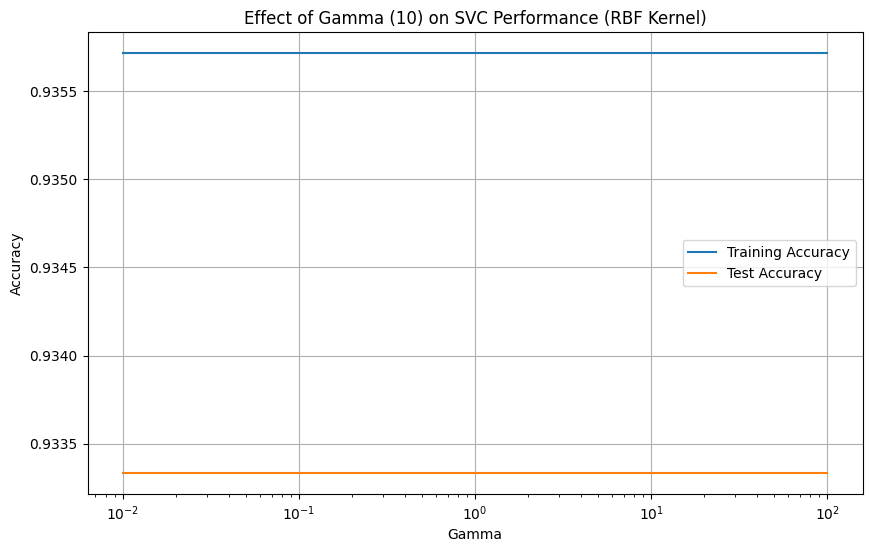

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Function to visualize the effect of gamma on SVC performance
def plot_svc_gamma_performance(gamma_value):
    # Generate a moons dataset with a moderate noise level
    X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

    # Splitting dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Range of gamma values to explore
    gamma_values = np.logspace(-2, 2, 20)  # Vary gamma from 0.01 to 100
    train_scores = []
    test_scores = []

    # Explore the effect of gamma
    for gamma in gamma_values:
        clf = SVC(C=1, kernel='rbf', gamma=gamma_value)  # Using specified gamma value
        clf.fit(X_train, y_train)

        # Record training and test scores
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.semilogx(gamma_values, train_scores, label='Training Accuracy')
    plt.semilogx(gamma_values, test_scores, label='Test Accuracy')
    plt.legend()
    plt.xlabel('Gamma')
    plt.ylabel('Accuracy')
    plt.title(f'Effect of Gamma ({gamma_value}) on SVC Performance (RBF Kernel)')
    plt.grid(True)
    plt.show()

# Call the function with different gamma values to visualize the effect
plot_svc_gamma_performance(gamma_value=0.1)  # Example: low gamma value
plot_svc_gamma_performance(gamma_value=1)    # Example: moderate gamma value
plot_svc_gamma_performance(gamma_value=10)   # Example: high gamma value
